In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

In [2]:
!pip install wordcloud

In [5]:
url = 'course_data.csv'
df = pd.read_csv(url, encoding = 'utf-8', encoding_errors='ignore')
df.head()

,Title,Offered by,Level,Rating,URL,Description,Skills
0,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,Intermediate,4.5,https://in.coursera.org/professional-certifica...,This Professional Certificate is intended for ...,Manage Azure resources for machine learning De...
1,Machine Learning Specialization,Stanford University,Beginner,4.9,https://in.coursera.org/specializations/machin...,The Machine Learning Specialization is a found...,Decision Trees Artificial Neural Network Logis...
2,Machine Learning Engineering for Production (M...,DeepLearning.AI,Advanced,4.7,https://in.coursera.org/browse/data-science/ma...,Understanding machine learning and deep learni...,Managing Machine Learning Production Systems D...
3,Fundamentals of Machine Learning for Healthcare,Stanford University,Beginner,4.8,https://in.coursera.org/learn/fundamental-mach...,Machine learning and artificial intelligence h...,Machine learning Biostatistics Traditional com...
4,IBM Machine Learning Professional Certificate,IBM,Intermediate,4.6,https://in.coursera.org/professional-certifica...,Machine Learning is one of the most in-demand ...,Artificial Intelligence (AI) Machine Learning ...


In [11]:
# This dataframe contains some useless columns which must be dropped for a better analytics result
uc = ['URL']  # uc means useless columns
df = df.drop(columns=uc)
df.head()

,Title,Offered by,Level,Rating,Description,Skills
0,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,Intermediate,4.5,This Professional Certificate is intended for ...,Manage Azure resources for machine learning De...
1,Machine Learning Specialization,Stanford University,Beginner,4.9,The Machine Learning Specialization is a found...,Decision Trees Artificial Neural Network Logis...
2,Machine Learning Engineering for Production (M...,DeepLearning.AI,Advanced,4.7,Understanding machine learning and deep learni...,Managing Machine Learning Production Systems D...
3,Fundamentals of Machine Learning for Healthcare,Stanford University,Beginner,4.8,Machine learning and artificial intelligence h...,Machine learning Biostatistics Traditional com...
4,IBM Machine Learning Professional Certificate,IBM,Intermediate,4.6,Machine Learning is one of the most in-demand ...,Artificial Intelligence (AI) Machine Learning ...


In [6]:
r,c = df.shape
print("Number of customers  = ",r)
print("Number of parameters = ",c)

Number of customers  =  88
Number of parameters =  7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        88 non-null     object
 1   Offered by   88 non-null     object
 2   Level        88 non-null     object
 3   Rating       88 non-null     object
 4   URL          88 non-null     object
 5   Description  88 non-null     object
 6   Skills       88 non-null     object
dtypes: object(7)
memory usage: 4.9+ KB


In [26]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [8]:
data = df['Level'].value_counts()
data

Beginner        41
Intermediate    36
Advanced        11
Name: Level, dtype: int64

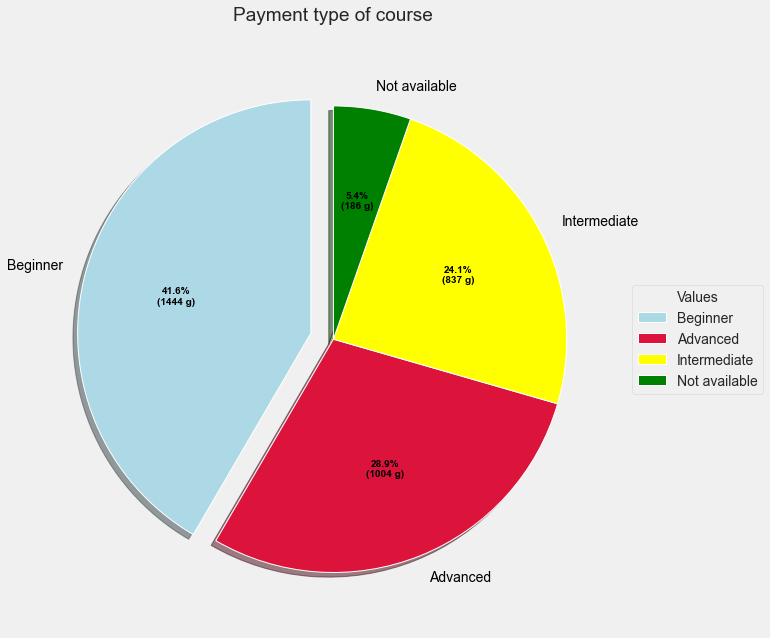

In [29]:
mag = ['Beginner','Advanced','Intermediate','Not available']
  
data = [1444,1005,837,186]
explode = (0.1,0.0,0.0,0.0) 
  
# Creating color parameters 
colors = ("lightblue","crimson","yellow","green") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Payment type of course\n",size=19) 
  
# show plot 

plt.show()

In [11]:
df['Rating'].value_counts()

4.7    21
4.6    20
4.5    14
4.8    12
4.9     5
4.4     4
4.2     1
4.3     1
Name: Rating, dtype: int64

In [10]:
df = df[df['Rating'] != 'Not available']

In [2]:
df['Rating'] = df['Rating'].astype(float)
df

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Count of course types\n')

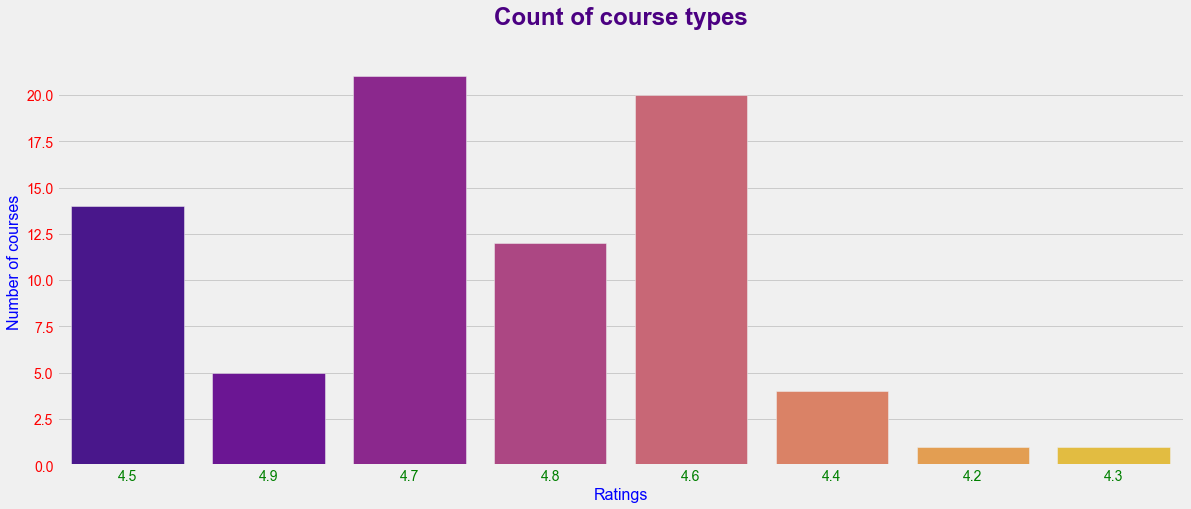

In [12]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Rating',palette='plasma')
plt.xlabel('Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

In [35]:
df2 = df[df['Rating'] > 4.0]
df2.head(10)

,Title,Offered by,Level,Rating,URL,Description,Skills
0,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,Intermediate,4.5,https://in.coursera.org/professional-certifica...,This Professional Certificate is intended for ...,Manage Azure resources for machine learning De...
1,Machine Learning Specialization,Stanford University,Beginner,4.9,https://in.coursera.org/specializations/machin...,The Machine Learning Specialization is a found...,Decision Trees Artificial Neural Network Logis...
2,Machine Learning Engineering for Production (M...,DeepLearning.AI,Advanced,4.7,https://in.coursera.org/browse/data-science/ma...,Understanding machine learning and deep learni...,Managing Machine Learning Production Systems D...
3,Fundamentals of Machine Learning for Healthcare,Stanford University,Beginner,4.8,https://in.coursera.org/learn/fundamental-mach...,Machine learning and artificial intelligence h...,Machine learning Biostatistics Traditional com...
4,IBM Machine Learning Professional Certificate,IBM,Intermediate,4.6,https://in.coursera.org/professional-certifica...,Machine Learning is one of the most in-demand ...,Artificial Intelligence (AI) Machine Learning ...
5,"Unsupervised Learning, Recommenders, Reinforce...",Stanford University,Beginner,4.9,https://in.coursera.org/learn/unsupervised-lea...,In the third course of the Machine Learning Sp...,Collaborative Filtering Unsupervised Learning ...
6,Introduction to Machine Learning in Production,DeepLearning.AI,Advanced,4.8,https://in.coursera.org/learn/introduction-to-...,In the first course of Machine Learning Engine...,Human-level Performance (HLP) Concept Drift Mo...
7,Applied Machine Learning in Python,Michigan University,Intermediate,4.6,https://in.coursera.org/learn/python-machine-l...,This course will introduce the learner to appl...,Python Programming Machine Learning (ML) Algor...
8,Getting Started with AWS Machine Learning,AWS,Intermediate,4.5,https://in.coursera.org/learn/aws-machine-lear...,Machine learning (ML) is one of the fastest gr...,Artificial Intelligence (AI) Machine Learning ...
9,DeepLearning.AI TensorFlow Developer Professio...,DeepLearning.AI,Intermediate,4.7,https://in.coursera.org/professional-certifica...,TensorFlow is one of the most in-demand and po...,Computer Vision Convolutional Neural Network M...


In [36]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['Title'])
course_user = df.pivot_table(columns='Title',values='Rating')
course_user.head()

Title,A Crash Course in Data Science,AI For Everyone,AI Workflow: AI in Production,AI Workflow: Business Priorities and Data Ingestion,AI Workflow: Data Analysis and Hypothesis Testing,"AI Workflow: Machine Learning, Visual Recognition and NLP",AI in Healthcare Specialization,Analyze Datasets and Train ML Models using AutoML,Applied Machine Learning in Python,"Applied Plotting, Charting & Data Representation in Python",...,Probabilistic Graphical Models 3: Learning,SAS Programmer Professional Certificate,SQL for Data Science,Satisfaction Guaranteed: Develop Customer Loyalty Online,Sports Performance Analytics Specialization,Teaching Impacts of Technology in K-12 Education Specialization,The AI Ladder: A Framework for Deploying AI in your Enterprise,Think Outside the Inbox: Email Marketing,"Unsupervised Learning, Recommenders, Reinforcement Learning",Wearable Technologies and Sports Analytics
Rating,4.5,4.8,4.5,4.3,4.2,4.4,4.7,4.6,4.6,4.5,...,4.6,4.8,4.6,4.8,4.5,4.8,4.7,4.7,4.9,4.8


In [37]:
df = df.rename(columns={'Title':'course_title'})

In [40]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('A Crash Course in Data Science')

--------------- Similar courses to your search --------------:



69                          Data Science Specialization
44          Introduction to Data Science Specialization
48     Data Science: Foundations using R Specialization
1                       Machine Learning Specialization
60     Learn SQL Basics for Data Science Specialization
18    Practical Data Science on the AWS Cloud Specia...
21                         Deep Learning Specialization
29                      AI in Healthcare Specialization
12      Mathematics for Machine Learning Specialization
77                                 SQL for Data Science
Name: course_title, dtype: object

In [14]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
    
# Two lists of words
word1 = ['computer vision',
         'man',
         'movie',
         'friend']
    
word2 = ['machine learning',
          'boy',
          'film',
          'love']
    
#Compute embedding for both lists
embeddings1 = model.encode(word1, convert_to_tensor=True)
embeddings2 = model.encode(word2, convert_to_tensor=True)
  
#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)
    
 #Output the pairs with their score
for i in range(len(word1)):
        print("{} \t\t {} \t\t Score: {:.4f}".format(word1[i], word2[i], cosine_scores[i][i]))

computer vision 		 machine learning 		 Score: 0.5184
man 		 boy 		 Score: 0.5843
movie 		 film 		 Score: 0.8426
friend 		 love 		 Score: 0.4168


In [15]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=b47464ec90edbaa8dec4a43ef1501a09c8d0703fcbf9f465ce1cfeec3dac5a07
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number


In [23]:
from word2number import w2n

print(w2n.word_to_num("three"))

3
